## Quick Machine Learning
### Part. 3 Optimization

### Linear Regression
- **Linear Regression** makes predictions using a linear function: $\hat y_{i} = wx_{i}$.
    - $w$ is the weight or regression coefficient of $x_{i}$, affecting rate of $\hat y_{i}$ increase/decrease.
- Minimize sum of squares errors objective: $f(w)=\sum_{i=1}^{n}(wx_{i}-y_{i})^2$
- Minimize differentiable function: solve $f'(w)=0$, choose smallest one and check $f''(w)>0$.
    - For w of sum of squared errors: $w=\frac{\sum_{i}^{n}x_{i}y_{i}}{\sum_{i}^{n}x_{i}^{2}}$. Check minimizer by checking $f''(w)=\sum_{i}^{n}x_{i}^{2}>0$.
- **d-Dimensional Linear Model**: $\hat y_{i} = w_{1}x_{i1} + w_{2}x_{i2}...w_{d}x_{id} = \sum_{j=1}^{d}w_{j}x_{ij} = w^{T}x_{i}$
    - thus to minimize sum of squares errors objective in d-Dimensions: $f(w)=\sum_{i=1}^{n}(w^{T}x_{i}-y_{i})^2$
- Gradient is vector with partial derivative j in position j.
    - gradient for sum of squares is $Aw-b+0=X^{T}Xw-X^{T}y$, the minimizer to this objective are the solutions to the linear system.
    - forming vector $X^{T}y$ is $O(nd)$, matrix $X^{T}X$ is $O(nd^{2})$, solving d by d system of equations is $O(d^{3})$, thus overall $O(nd^{2}+d^{3})$
- Least Squares assumes linearity. It may predict outside of range values, data can be big that we can't store $X^{T}X$, features must all be used. Solution can be not unique and it is sensitive to outliers.
    - Solution is unique iff all columns of $X$ are linearly independent.
- Y-intercept is omitted, but we add a bias variable that is always 1.
- Non-linear features can be transformed by change of basis, e.g. $\hat y_{i} = w_{1}x_{i} + w_{2}x_{i}^{2}...w_{p}x_{i}^{p}$
    - when polynomial degree increases, training error falls, approximation error goes up when overfitting with large $p$. Use cross-validation here.

### Gradient Descent
- Optimization is maximizing or minimizing an objective by a minimizer.
- **Gradient Descent** is an iterative optimization algorithm.
    - Initialize at guess $w^{0}$
    - Use $\nabla f(w^{0})$ to guess $w^{1}$
    - Use $\nabla f(w^{1})$ to guess $w^{2}$
    - $\lim_{t\to\infty} \nabla f(w^{t})=0$, convergence.
- New guess: $w^{t+1}=w^{t}-\alpha^{t} \nabla f(w^{t})$ for t = 1,2,3...
- For Least squares using gradient descent, cost is $O(ndt)$.
- **Convexity** applies if area above the function is a convex set, such as:
    - Twice-differentiable function positive for all $w$
    - Convex function multiplied by constant
    - Composition of convex and linear functions
    - Sum or max of convex functions
    - Norms or squared norms
    - *NOT* convex: multiplication or composition of convex functions

### Robust Regression
- In least sqaures, squaring the rror shrinks the small errors but magnifies large ones. Large errors influence $w$ much more than other points.
- **Robust Regression** objectives focus less on large errors, e.g. use absolute error instead of squared error.
    - L1-norm: $f(w)=||Xw-y||_{1}=\sum_{i=1}^{n}|w^{T}x_{i}-y_{i}|$
    - Yet, minimizing absolute error is harder since we don't have normal equations, absolute value is non-differentiable at 0.
    - Unlike smooth functions, gradient may not get smaller near a minimizer. To apply gradient descent, we use smooth approximation.
    - Huber Loss is a smooth approximations to absolute value: $f(w)=\sum_{i=1}^{n}h(w^{T}x_{i}-y_{i})$
     $ h(r_{i})=   \left\{
\begin{array}{ll}
      \frac{1}{2}r_{i}^{2} & |r_{i}|<=\epsilon \\
      \epsilon(|r_{i}|-\frac{1}{2}\epsilon) & otherwise \\
\end{array} 
\right.$
    - "h" is differentiable, $h'(\epsilon)=\epsilon$
    - "f" is convex but $\nabla f(x)=0$ doesn't give a linear system. We can minimize Huber loss using gradient descent.
- Non-convex errors can be very robust, not influenced by outliers, but finding global minimum is hard.
- Brittle Regression: using $L_{\infty}$ error is more sensitive to outliers. Also not differentiable, use logsumexp to solve.
- Log-Sum-Exp: $max_{i}(z_{i})\approx \ln(\sum_{i}exp(z_{i}))$

### Finding the True Model
- There are lot of scores used to find the true model. 
- The idea is to put a penalty on the model complexity, e.g. minimize training error plus the degree of polynomial $score(p)=\frac{1}{2}||Z_{p}v-y||^{2}+p$. We optimize by:
    - form $Z_{0}$, solve for v, compute score(0)
    - form $Z_{1}$, solve for v, compute score(1)...
    - choose degree with lowest score
- Information Criteria are in the form of $score(p)=\frac{1}{2}||Z_{p}v-y||^{2}+\lambda k$, where $k$ is the degrees of freedom, and $\lambda > 0$ controls how strong we penalize complexity (you need to decrease training error by at least $\lambda$ to increase $k$ by 1).
- $\lambda =1$ is called Akaike information criterion (AIC), others include Mallows $C_{p}$, ajusted $R^{2}$, ANOVA-based model selection, Bayesian IC where $\lambda =\frac{1}{2}log(n)$.

### Feature Selection
- Feature is relevant if helps predict $y_{i}$ from $x_{i}$.
- Association Approach: for each feature $j$, compute correlation between feature values $x^{j}$ and $y$. This turns feature selection into hypothesis testing for each feature and ignores variable interctions.
    - GWAS: measure association between each single nucleotide polymorphism in the genome and a disease. Yet, huge number of false positives.
- Regression Weight Approach: fit regression weights based on all features, take all features $j$ where weight $|w_{j}|$ is greater than a threshold. This has major problems with **collinearity**.
- **Search and Score** Method: define score function $f(S)$ that measures quality of a set of features $S$.
    - compute score of feature {1}
    - compute score of feature {2}
    - compute score of feature {1,2}
    - compute score of feature {}
    - return set of features with best score
- Score can be the validation error. If we have $d$ variables, there will be $2^{d}$ sets of variables. Prone to false positives and optimization bias is high.
    - To reduce false positives, we can use complexity penalties: $score(S)=\frac{1}{2}\sum_{i=1}^{n}(w_{s}^{T}x_{is}-y_{i})^{2}+ size(S)$, if two $S$ has similar error, take the smaller set.
    - instead of $size(S)$, we write L0-norm which is the number of non-zero values.
- Score can be the **L0-Norm Penalty / L0-Regularization**: $f(w)=\frac{1}{2}||Xw-y||^{2}+ \lambda ||w||_{0}$.
- Search and Score is hard to search for best $S$ due to $2^{d}$ sets. Solve by using Forward Selection which is a greedy search heuristic $O(d^{2})$.
    - compute score if use no features {}
    - add each feature once and add feature with the best score to {}
    - add each feature to the {feature_1} once and add feature with the best score, check if {feature_1 U feature_2} improves the best score, then iterate.
- Relevance in feature selection depends on collinearity, conditional independence, effect size, confounding, causality, context-specific problems. Relevance doesn't imply causal relationship.



### L2-Regularization / Ridge Regression
- Regularization adds a penalty on the complexity of the model. This increases training error but decreases approximation error.
- L2-regularization: $f(w)=\frac{1}{2}||Xw-y||^{2}+ \frac{\lambda}{2} ||w||^{2}$.
    - intuition is large slopes $w_{j}$ tend to lead to overfitting. Larger $\lambda$ puts larger penalty on slopes.
    - How to choose $\lambda$? as n grows $\lambda$ should be in the range $O(1)->O(\sqrt{n})$.
- Regularization path is a plot of optimal weights $w_{j}$ as $lambda$ varies.
- L2 gradient: $\nabla f(w)=X^{T}Xw-X^{T}y+\lambda w$
- L2 linear system: $(X^{T}X+\lambda I)w=X^{T}y$
    - unlike $X^{T}X$, matrix $(X^{T}X+\lambda I)$ is always invertible.
    - multiple by its inverse for unique solution.
- L2 Gradient Descent Iterations: $w^{t+1}=w^{t}-\alpha^{t}\nabla f(w^{t})$ $\nabla f(w^{t})=X^{T}(Xw^{t}-y)+\lambda w$, number of iterations decrease as $\lambda$ increases.
- Should we standardize unit? 
    - It doesn't matter for decision trees, naive Bayes, least squares.
    - It does for KNN, regularized least squares.
- Standardizing continuous features using z-scores for each feature is common practice. Standardizing test data should use mean and standard deviation of the training data.

### Radial Basis Function
- Parametric Bases: linear models with polynomials, exponentials, logs, trignometric functions.
- Non-parametric Bases: size of basis grows with $n$, with enough data can model complicated functions, e.g. Gaussian RBF.
- Gaussian RBF: universal approximators that acheive optimal test error as n goes to infinity.
    - intuition is to use $n$ bumps where each bump is centered on one training example $x_{i}$. Fitting regression weights $w$ gives us heights of bumps. Widths of bumps is a hyper-parameter, the more narrow the more complicated the model.
- Radial Basis Functions (RBF): a set of non-parametric bases that depend on distances to training points. $replace\ x_{i}=(x_{i1},x_{i2}...x_{id})\ with\ z_{i}=(g(||x_{i}-x_{1}||),g(||x_{i}-x_{2}||)...g(||x_{i}-x_{n}||)) $
    - going from $d$ features to $n$ features.
    - having $n$ features with each feature $j$ depending on distance to example $i$.
    - Gaussian RBF is $g$: $g(\epsilon)=\exp{(-\frac{\epsilon^{2}}{2\sigma^{2}})}$, variance here is a hyper-parameter controlling width.
    - Constructing RBF given data $X$ and hyper-parameter $\sigma$.
        - Z = np.zeros((n,n))
        - for i in range(n) and for j in range(n):
            - $Z[i,j]=np.exp(\frac{-norm(X[i,:]-X[j,:])^{2}}{2\sigma^{2}})$
- Gaussian RBF predictions: $\hat{y_{i}}=\sum_{j=1}^{n}w_{j}\exp{(-\frac{||x_{i}-x_{j}||^{2}}{2\sigma^{2}})}$
    - flexible bases can model any continuous function, but with $n$ data points RBF has $n$ basis functions.
    - avoid overfitting by regularizing $w$ and using validation error to choose $\sigma$ and $\lambda$.
- Good Model Example: RBF basis with L2-regularization and cross-validation to choose $\sigma$ and $\lambda$.
    - for each value of $\sigma$ and $\lambda$:
        - compute $Z$ on training data
        - compute best $v$, $v=(Z^{T}Z+\lambda I)^{-1}Z^{T}y$
        - compute $\tilde{Z}$ on validation data using training data distances
        - make predictions $\hat{y}=\tilde{Z}v$
        - compute validation error $||\hat{y}-\tilde{y}||^{2}$
- Hyper-parameter Optimization: try to efficiently find best parameters, e.g. coordinate search, stochastic local search, Bayesian optimization.

### L1-Regularization / LASSO Regularization
- L1-regularization: $f(w)=\frac{1}{2}||Xw-y||^{2}+ \lambda ||w||_{1}$.
    - convex and improves test error, like L2-norm
    - encourages elements of $w$ to be 0, like L0-norm
    - simultaneously regularizes and selects features   
    - requires iterative solver
    - solution is not unique, unlike L2-regularization
    - can learn with exponential number of irrelevant features, unlike L2 which learn only linear number of irrelevant features.
    
- Note: $f(w)=\frac{1}{2}||Xw-y||^{2}+ \lambda ||w||_{1}$ is L2-loss + L1-regularizer

### Summary Table for Regularizers

|  | sparse w | speed | unique w  | irrelevant features|
|------|------|------|------|------|
|L0 | Yes | Slow | No | Not Sensitive |
|L1 | Yes | Fast | No | Not Sensitive |
|L2 | No | Fast | Yes | Sensitive |

### Linear Classifiers
- Perceptron Algorithm for Linear-Seperable Data
    - start with $w_{0}=0$
    - go through examples until you make mistake predicting $y_{i}$, set $w^{t+1}=w^{t}+y_{i}x_{i}$
    - resume until no errors on training data
- If perfect classifier exists, algorithms finds one in finite steps.
- 0-1 Loss Function: you either get classification wrong(1) or right(0).
    - ideal but non-smooth and non-convex in $w$, if no perfect classifer exists then it is a hard problem. Gradient is 0 everywhere.
- Degenerate convex approximation to 0-1 loss
    - if $y_{i}=+1$, we get label right if $w^{T}x_{i}>0$
    - if $y_{i}=-1$, we get label right if $w^{T}x_{i}<0$
    - thus, classifying $i$ correctly is $y_{i}w^{T}x_{i}>0$
    - this has degenerate solution of $\sum_{i=1}^{n}\max {(0, -y_{i}w^{T}x_{i})}$ since $f(0)=0$ and the lowest possible of $f$. Use hinge or logistic loss.
- Hinge Loss: $f(w)=\sum_{i=1}^{n}\max {(0, 1-y_{i}w^{T}x_{i})}$
    - convex, not degenerate $w=0$ gives $error=1$
- Support Vector Machine is hinge loss + L2-regularization: $f(w)=\sum_{i=1}^{n}\max {(0, 1-y_{i}w^{T}x_{i})} + \frac{\lambda}{2}||w||^{2}$
    

- Logistic Loss: $\sum_{i=1}^{n}\max {(0, -y_{i}w^{T}x_{i})} \approx \log{(\exp{(0)}+\exp{(-y_{i}w^{T}x_{i}}))}$

In [6]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize
import sklearn.linear_model

In [7]:
# optimization using minimization
result = minimize(lambda x: np.linalg.norm(x-5)+3, np.random.rand(3))
print("min =", result.fun)
print("arg min =", result.x)

min = 3.0000000055708536
arg min = [5. 5. 5.]


w = -0.005920
b = -4.363263


Text(0, 0.5, 'y')

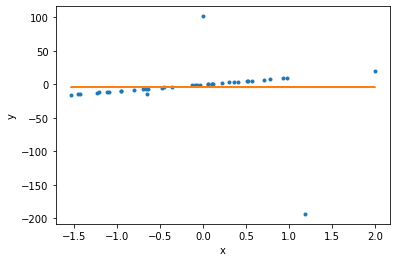

In [9]:
def gen_outlier_data(n=40,Noutliers=3):
    # generate random data
    x = np.random.randn(n)
    y = 10*x
    # add random outliers
    y[:Noutliers] = -100*(x[:Noutliers]+np.random.randn(Noutliers))
    X = x[:,None]
    return X,y

# fit a linear regression model
X,y = gen_outlier_data()
lr = sklearn.linear_model.LinearRegression()
lr.fit(X,y)

print("w = %f" % lr.coef_)
print("b = %f" % lr.intercept_)
plt.plot(X,y,'.')
plt.plot(X, lr.predict(X))
plt.xlabel('x')
plt.ylabel('y')

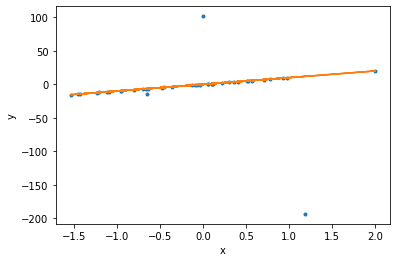

w = 9.996783
β = 0.001844


In [11]:
x = X.flatten()
w = 0
β = 0
α = 1

Nsteps = 1000

for t in range(1,Nsteps):
    dLdw = np.sum(x*np.sign(w*x+β-y))
    dLdβ = np.sum(np.sign(w*x+β-y))
    w -= (α/t)*dLdw # we are decreasing the step size over time to deal with the non-smoothness
    β -= (α/t)*dLdβ # the details are beyond the scope of the course, see CPSC 540
    
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,w*x+β)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("w = %f" % w)
print("β = %f" % β)